# Exercise 1

The **aims** of this exercise are:

*   Allow you practice slicing and analysing data with Pandas
*   Introduce you to the MovieLens dataset
*   Demonstrate use of Pandas to perform non-personalised and personalised recommendations


In [2]:
#Standard setup
import pandas as pd
import numpy as np

#Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

In [3]:
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0   759k      0  0:00:01  0:00:01 --:--:--  759k
Archive:  ml-latest-small.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Let's look into the files using Pandas:

In [4]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [5]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


In [84]:
movies_df["title"]

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [85]:
movies_df[["movieId", "title"]]

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)
...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017)
9738,m193583,No Game No Life: Zero (2017)
9739,m193585,Flint (2017)
9740,m193587,Bungo Stray Dogs: Dead Apple (2018)


 - Select rows based on one or more conditions

In [86]:
ratings_df[(ratings_df["userId"] == 'u500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp
79908,u500,m11,1.0,1005528017
79909,u500,m39,1.0,1005527926
79910,u500,m101,1.0,1005527980
79915,u500,m231,1.0,1005528039
79923,u500,m449,1.0,1005528017
79924,u500,m471,1.0,1005528017
79926,u500,m539,1.0,1005527980
79931,u500,m597,1.0,1005527980
79934,u500,m745,1.0,1005528205
79939,u500,m1188,1.0,1005528065




Lets practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions:

## Task 1. How many users are there in this dataset?


In [87]:

ratings_df["userId"].nunique()

610

## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

Hint: Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the ratings_df dataframe. [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.


In [6]:
ratings_df.groupby("userId").mean()

,rating,timestamp
userId,,
u1,4.366379,9.649856e+08
u10,3.278571,1.455351e+09
u100,3.945946,1.100186e+09
u101,3.557377,9.684412e+08
u102,3.357143,8.360463e+08
...,...,...
u95,4.062500,1.063984e+09
u96,3.884615,9.647732e+08
u97,4.194444,1.044293e+09


In [89]:
ratings_df.groupby(["userId"]).mean()["rating"].loc["u200"]

3.809880239520958

## Task 3. What is the average number of ratings per-user? 

In [90]:

ratings_df.groupby(["userId"]).count()["rating"].mean()


165.30491803278687

## Analysing users's preferences.

In [91]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


## Task 4. Analysing movie categories

In [92]:
df1=pd.merge(
    ratings_df[ratings_df["userId"]=='u7'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)

print("count of movies for u7 with Fantasy genre",len(df1[df1['genres'].str.contains('Fantasy') & (df1['rating']>=4)]))

df2=pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)

Fantasy_genre=(len(df2[df2['genres'].str.contains('Fantasy') & (df2['rating']>=4)]))
print("count of movies for u556 with fantasy genre",Fantasy_genre)
print("percentage:",(Fantasy_genre/len(df2['rating']))*100)

count of movies for u7 with Fantasy genre 11
count of movies for u556 with fantasy genre 22
percentage: 68.75


# Part B. Popularity-based Recomendation

Now lets examine the ratings of movies. 

In [93]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25]

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


##Task 5. Plot the distribution of movie ratings.

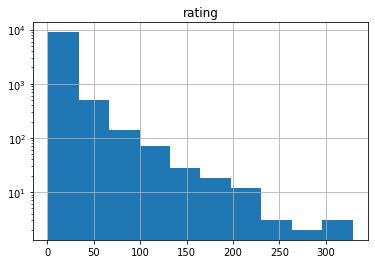

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
groupingCountSeries.hist(bins=10,log=True)
plt.savefig('movieratings.png')


## Task 6. Find the names of *all* of the movies that have the highest *average* ratings?


In [95]:

movies_group = ratings_df[["movieId", "rating"]].groupby(["movieId"])
movies_group_ratings=movies_group.agg(meanRating=('rating',np.mean))
movies_group_ratings['Number of ratings']=movies_group.count()

movies_highest_rating_details=pd.merge(
    movies_group_ratings.reset_index(), 
    movies_df[['title','movieId']].reset_index(), 
    on=["movieId"], right_index=True).sort_values(['meanRating'],ascending=False)

print(movies_highest_rating_details)
num_of_ratings = movies_highest_rating_details[movies_highest_rating_details['movieId']=='m6442']
print("no.of users rated movie: \n",num_of_ratings)
movies_highest_df1=movies_highest_rating_details[movies_highest_rating_details['meanRating']==5.0]
print(" \n movies with high average rate:",len(movies_highest_df1[["movieId","meanRating"]].groupby(["movieId","meanRating"]).count()))

movies_highest_df1[["meanRating",'Number of ratings']].groupby(["meanRating",'Number of ratings']).count()



      movieId  ...                                              title
1911  m167064  ...                         I Am Not Your Negro (2017)
1240  m138966  ...                   Nasu: Summer in Andalusia (2003)
6243   m53578  ...                    Valet, The (La doublure) (2006)
1254  m139640  ...                      Ooops! Noah is Gone... (2015)
8567   m79897  ...                                     Get Low (2009)
...       ...  ...                                                ...
4858    m4051  ...  Horrors of Spider Island (Ein Toter Hing im Ne...
5601    m4750  ...                         3 Ninjas Knuckle Up (1995)
1877  m165645  ...                                 Bad Santa 2 (2016)
1760  m160872  ...                                     Satanic (2016)
1319  m141668  ...                                    War Room (2015)

[9724 rows x 5 columns]
no.of users rated movie: 
      movieId  meanRating  Number of ratings  index                title
7301   m6442         5.0            

Empty DataFrame
Columns: []
Index: [(5.0, 1), (5.0, 2)]

# Part C - Association Rules and Lift

In [96]:
positives = ratings_df[ratings_df["rating"]>=4]

#join positives with itself on userId to get all pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])

#we only want A->B, not B->A. Use the timestamps to restrict the selected pairs
sequences = pairs[pairs["timestamp_x"] < pairs["timestamp_y"]] 

#lets count the frequency of each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

#sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

#display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1574483,m318,m356,104
1416644,m296,m593,92
1416033,m296,m47,91
1187221,m260,m1196,91
1575263,m318,m527,90


## Task 7. Display the titles of the (most popular) movie pairs from `pairswithcounts`?

In [103]:
#add your solution here
movies_details=pd.merge(
    ratings_df.reset_index(), 
    movies_df[['title','movieId']], 
    on=["movieId"], right_index=True)
positives_new = movies_details[movies_details["rating"]>=4]
print(positives_new)
#join positives with itself on userId to get all pairs of movies watched by a given user.
pairs_new = pd.merge(positives_new, positives_new, on=["userId"])

#we only want A->B, not B->A. Use the timestamps to restrict the selected pairs
sequences_new = pairs_new[pairs_new["timestamp_x"] < pairs_new["timestamp_y"]] 

#lets count the frequency of each pair of movies.
paircounts_new = sequences_new[["movieId_x", "movieId_y","title_x","title_y", "userId"]].groupby(["movieId_x", "movieId_y","title_x","title_y"]).count()

#sort by the most popular pairs.
pairswithcounts_new = paircounts_new.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

#display the top most frequent pairs
pairswithcounts_new.head()
pairswithcounts_new[pairswithcounts_new["count"]==74]

         index userId  ...   timestamp                             title
0            0     u1  ...   964982703                  Toy Story (1995)
516        516     u5  ...   847434962                  Toy Story (1995)
874        874     u7  ...  1106635946                  Toy Story (1995)
1667      1667    u17  ...  1305696483                  Toy Story (1995)
2274      2274    u19  ...   965705637                  Toy Story (1995)
...        ...    ...  ...         ...                               ...
100787  100787   u610  ...  1479544170         Invincible Shaolin (1978)
100793  100793   u610  ...  1493848878                 Last Shift (2014)
100798  100798   u610  ...  1493850187      The Boy and the Beast (2015)
100799  100799   u610  ...  1479544210            Masked Avengers (1981)
100821  100821   u610  ...  1479544998  Sympathy for the Underdog (1971)

[48580 rows x 6 columns]


,movieId_x,movieId_y,title_x,title_y,count
3273787,m858,m1221,"Godfather, The (1972)","Godfather: Part II, The (1974)",74


## Task 8. Calculate Lift for all pairs in `pairwithcounts`.  

In [98]:

movieId_x_title=pd.merge(pairswithcounts,movies_df,left_on=['movieId_x'],right_on=['movieId'])
movieId_x_title.rename(columns={"title":'movie_x_title'},inplace=True)
movieId_x_title.drop(columns=['movieId'],inplace=True)

movieId_xy_title=pd.merge(movieId_x_title,movies_df,left_on=['movieId_y'],right_on=['movieId'])
movieId_xy_title.rename(columns={"title":'movie_y_title'},inplace=True)
movieId_xy_title.drop(columns=['movieId'],inplace=True)
movieId_xy_title

positives = ratings_df[ratings_df["rating"]>=4]
positives_count=positives[['movieId','rating']].groupby('movieId').count()
positives_count.reset_index(inplace=True)

movie_x_count=pd.merge(movieId_xy_title,positives_count,left_on=['movieId_x'],right_on=['movieId'])
movie_x_count.rename(columns={"rating":'ratingCount_x'},inplace=True)
movie_xy_count=pd.merge(movie_x_count,positives_count,left_on=['movieId_y'],right_on=['movieId'])
movie_xy_count.rename(columns={"rating":'ratingCount_y'},inplace=True)

movie_xy_count['lift']=(movie_xy_count['count']/len(ratings_df))/((movie_xy_count['ratingCount_x']/len(ratings_df))*(movie_xy_count['ratingCount_y']/len(ratings_df)))
movie_xy_count.sort_values(by=['lift'],ascending=False)


,movieId_x,movieId_y,count,movie_x_title,genres_x,movie_y_title,genres_y,movieId_x,ratingCount_x,movieId_y,ratingCount_y,lift
3533035,m43836,m1703,1,"Pink Panther, The (2006)",Adventure|Comedy|Crime,For Richer or Poorer (1997),Comedy,m43836,1,m1703,1,100836.000000
3197702,m2593,m2024,1,"Monster, The (Mostro, Il) (1994)",Comedy,"Rapture, The (1991)",Drama|Mystery,m2593,1,m2024,1,100836.000000
3197672,m1475,m2024,1,Kama Sutra: A Tale of Love (1996),Romance,"Rapture, The (1991)",Drama|Mystery,m1475,1,m2024,1,100836.000000
3197671,m166,m2024,1,"Doom Generation, The (1995)",Comedy|Crime|Drama,"Rapture, The (1991)",Drama|Mystery,m166,1,m2024,1,100836.000000
3197669,m602,m2024,1,"Great Day in Harlem, A (1994)",Documentary,"Rapture, The (1991)",Drama|Mystery,m602,1,m2024,1,100836.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10930,m329,m296,1,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,m329,42,m296,244,9.839578
1189641,m2959,m349,1,Fight Club (1999),Action|Crime|Drama|Thriller,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,m2959,179,m349,58,9.712579
3114754,m80463,m318,1,"Social Network, The (2010)",Drama,"Shawshank Redemption, The (1994)",Crime|Drama,m80463,38,m318,274,9.684595
15623,m454,m2571,1,"Firm, The (1993)",Drama|Thriller,"Matrix, The (1999)",Action|Sci-Fi|Thriller,m454,48,m2571,222,9.462838


In [99]:
movie_xy_count

,movieId_x,movieId_y,count,movie_x_title,genres_x,movie_y_title,genres_y,movieId_x,ratingCount_x,movieId_y,ratingCount_y,lift
0,m318,m356,104,"Shawshank Redemption, The (1994)",Crime|Drama,Forrest Gump (1994),Comedy|Drama|Romance|War,m318,274,m356,249,153.708909
1,m296,m356,87,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Forrest Gump (1994),Comedy|Drama|Romance|War,m296,244,m356,249,144.392850
2,m260,m356,47,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Forrest Gump (1994),Comedy|Drama|Romance|War,m260,201,m356,249,94.693041
3,m2571,m356,76,"Matrix, The (1999)",Action|Sci-Fi|Thriller,Forrest Gump (1994),Comedy|Drama|Romance|War,m2571,222,m356,249,138.636275
4,m593,m356,75,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,Forrest Gump (1994),Comedy|Drama|Romance|War,m593,225,m356,249,134.987952
...,...,...,...,...,...,...,...,...,...,...,...,...
3533031,m130490,m124851,1,Insurgent (2015),Action|Sci-Fi|Thriller,Delirium (2014),Adventure|Romance|Sci-Fi,m130490,1,m124851,1,100836.000000
3533032,m114265,m113829,1,Laggies (2014),Comedy|Romance,"One I Love, The (2014)",Comedy|Drama|Romance,m114265,1,m113829,1,100836.000000
3533033,m130490,m113829,1,Insurgent (2015),Action|Sci-Fi|Thriller,"One I Love, The (2014)",Comedy|Drama|Romance,m130490,1,m113829,1,100836.000000
3533034,m130490,m114265,1,Insurgent (2015),Action|Sci-Fi|Thriller,Laggies (2014),Comedy|Romance,m130490,1,m114265,1,100836.000000


If your solution is correct, you will see the highest lift movie pairs. 
Lets check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy). 

It should be clear that these lift pairs do not have high support. 

## Task 9 - Support Thresholds

Removing movie pairs with support count $< 10$.

I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing! 

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.


In [100]:

movie_xy_count[movie_xy_count['count']>=10].sort_values(by=['lift'],ascending=False)

,movieId_x,movieId_y,count,movie_x_title,genres_x,movie_y_title,genres_y,movieId_x,ratingCount_x,movieId_y,ratingCount_y,lift
1081107,m91500,m116823,11,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,m91500,24,m116823,15,3081.100000
1066026,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,m91500,24,m106487,14,3001.071429
595539,m115713,m139385,10,Ex Machina (2015),Drama|Sci-Fi|Thriller,The Revenant (2015),Adventure|Drama,m115713,20,m139385,19,2653.578947
768411,m91658,m67255,10,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller,"Girl with the Dragon Tattoo, The (Män som hata...",Crime|Drama|Mystery|Thriller,m91658,24,m67255,19,2211.315789
892671,m34162,m8807,10,Wedding Crashers (2005),Comedy|Romance,Harold and Kumar Go to White Castle (2004),Adventure|Comedy,m34162,25,m8807,19,2122.863158
...,...,...,...,...,...,...,...,...,...,...,...,...
15371,m457,m2571,13,"Fugitive, The (1993)",Thriller,"Matrix, The (1999)",Action|Sci-Fi|Thriller,m457,137,m2571,222,43.100809
3114554,m1206,m318,10,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,"Shawshank Redemption, The (1994)",Crime|Drama,m1206,86,m318,274,42.792395
3114542,m364,m318,13,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Shawshank Redemption, The (1994)",Crime|Drama,m364,115,m318,274,41.601650
10757,m457,m296,13,"Fugitive, The (1993)",Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,m457,137,m296,244,39.214670
